In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder



data = pd.read_csv("/content/IPL Ball-by-Ball 2008-2020.csv")

# Drop unnecessary columns
data.drop(['dismissal_kind', 'player_dismissed', 'fielder', 'extras_type'], axis=1, inplace=True)

# Convert 'is_wicket' to integer
data['is_wicket'] = data['is_wicket'].astype(int)

# Separate target variable (total_runs) and features (X)
X = data.drop('total_runs', axis=1)
y = data['total_runs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Identify numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Combine the peprocessing steps for al features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create and tran the Linear Regression
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_model.fit(X_train, y_train)

# Make predictions onhe test set usingLinear Regression
y_pred_lr = lr_model.predict(X_test)

# Calculate Mn Squared Error for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression Mean Squared Error:", mse_lr)

# Create and train the Randomorest Regressor model
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

rf_model.fit(X_train, y_train)

# Make predictions on the test set ung Random Forest Regressor
y_pred_rf = rf_model.predict(X_test)

# Calculate Mean Error for Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)




Linear Regression Mean Squared Error: 8.669019453062846e-11
Random Forest Mean Squared Error: 5.478885615340857e-07


In [4]:
import matplotlib.pyplot as plt

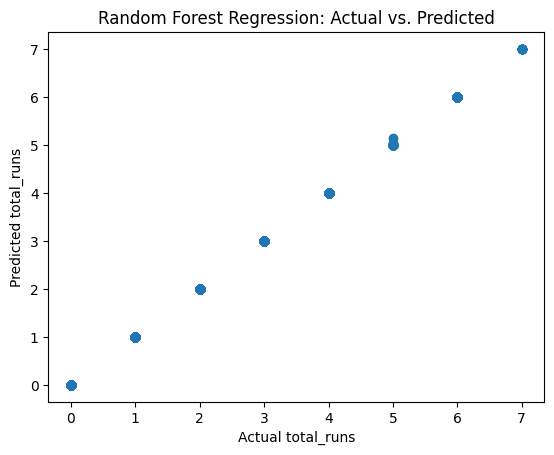

In [5]:
# Scatter Plot: Predicted vs. Actual for Random Forest Regression
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual total_runs")
plt.ylabel("Predicted total_runs")
plt.title("Random Forest Regression: Actual vs. Predicted")
plt.show()

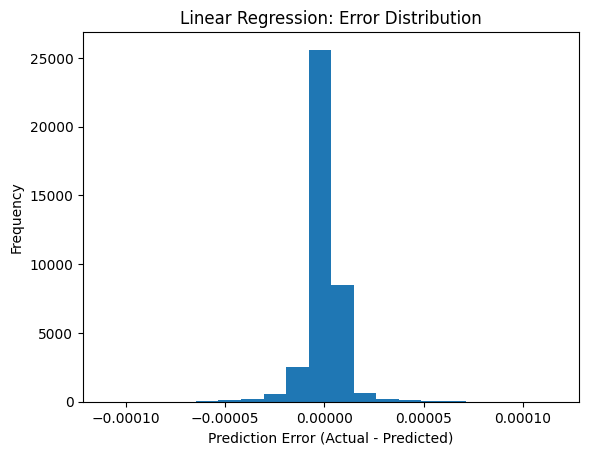

In [6]:


error_lr = y_test - y_pred_lr
plt.hist(error_lr, bins=20)
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Linear Regression: Error Distribution")
plt.show()

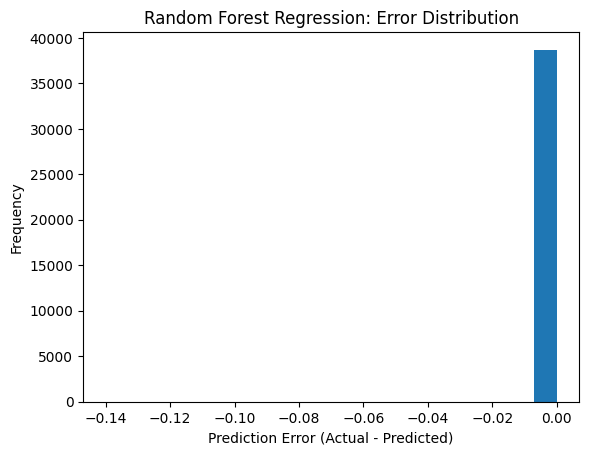

In [7]:
# Histogram for Random Forest Regression
error_rf = y_test - y_pred_rf
plt.hist(error_rf, bins=20)
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Random Forest Regression: Error Distribution")
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9975965265932702


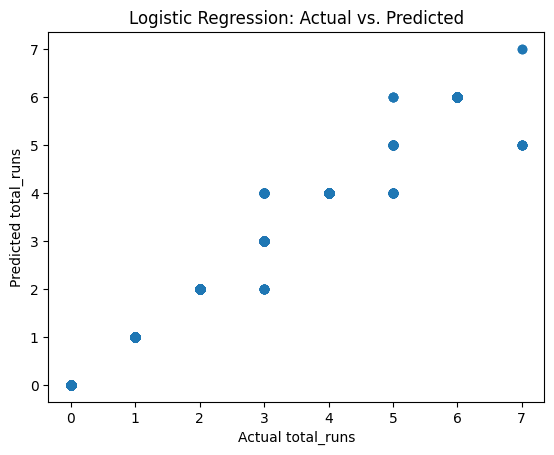

In [11]:
# train the Logistic Regression model
logreg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

logreg_model.fit(X_train, y_train)

# Making predictions on the test set using Logistic Regression
y_pred_logreg = logreg_model.predict(X_test)

#  Accuracy for Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

# Scatter Plo for Predicted vs. Actual for Logistic Regression
plt.scatter(y_test, y_pred_logreg)
plt.xlabel("Actual total_runs")
plt.ylabel("Predicted total_runs")
plt.title("Logistic Regression: Actual vs. Predicted")
plt.show()




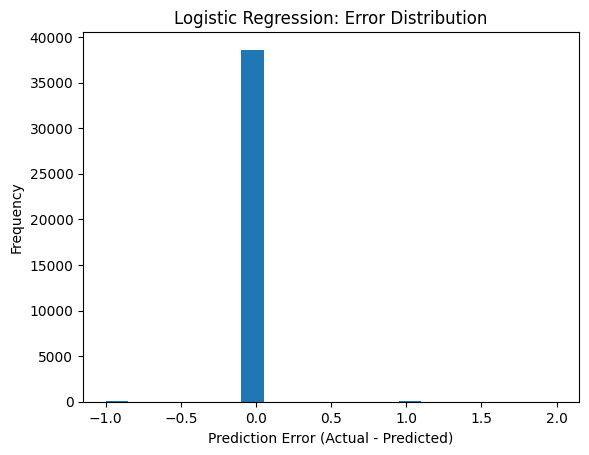

In [12]:
# Histogram:for Logistic Regression
error_logreg = y_test - y_pred_logreg
plt.hist(error_logreg, bins=20)
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Logistic Regression: Error Distribution")
plt.show()



In [13]:
# Confusion Matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix)

Confusion Matrix for Logistic Regression:
[[13577     0     0     0     0     0     0     0]
 [    0 16033     0     0     0     0     0     0]
 [    0     0  2577     0     0     0     0     0]
 [    0     0     9   111    40     0     0     0]
 [    0     0     0     0  4453     0     0     0]
 [    0     0     0     0    31    44     4     0]
 [    0     0     0     0     0     0  1804     0]
 [    0     0     0     0     0     9     0     2]]


In [15]:
# team's performance based on random forest predictions
def get_team_performance(team_name, total_overs_played):
    team_data = data[data['batting_team'] == team_name]
    X_team = team_data.drop('total_runs', axis=1)
    y_team = team_data['total_runs']
    y_pred_team = rf_model.predict(X_team)
    team_performance = y_pred_team.mean()
    run_rate = team_performance / total_overs_played
    performance_percent = (team_performance / 240) * 100
    chances_of_winning = performance_percent / 100
    return team_performance, run_rate, performance_percent, chances_of_winning

#user input
team_name = input("Enter the team name: ")
total_overs_played = float(input("Enter the total overs played by the team: "))

team_performance, run_rate, performance_percent, chances_of_winning = get_team_performance(team_name, total_overs_played)
print(f"{team_name} Performance based on Random Forest: {team_performance:.2f} runs")
print(f"{team_name} Run Rate: {run_rate:.2f} runs per over")
print(f"{team_name} Performance Percentage: {performance_percent:.2f}%")
print(f"{team_name} Chances of Winning: {chances_of_winning:.2f}")


Enter the team name: Kolkata Knight Riders
Enter the total overs played by the team: 20
Kolkata Knight Riders Performance based on Random Forest: 1.30 runs
Kolkata Knight Riders Run Rate: 0.07 runs per over
Kolkata Knight Riders Performance Percentage: 0.54%
Kolkata Knight Riders Chances of Winning: 0.01
